In [39]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *
import random,time
import numpy as np

In [40]:
#Quantum Teleportation.
#Alice and Bob are in an entangled state of (|11> + |00>)/sqrt(2)
#Thhe |psi> what allce wants to teleport is then form a bell pair with Alice Bit.
#Alice communicates the two bits with Bob through the classical channel(or thru phone ;))
#


Alice's qubit is:
(0.7184863250165051-0.6807050368051667j) |0> +  (-0.14157110248564336+0.01938237790759814j) |1>


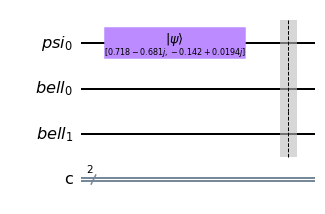

In [41]:
#lets form the qubit randomly which alice wants to communicate
#random.random()- Return the next random floating point number in the range [0.0, 1.0).


a1 = random.random()*2 -1 #Uniform number in [-1,1]
a2 = random.random()*2 -1
b1 = random.uniform(-1,1)
b2 = random.uniform(-1,1)

# We need to normalize

norm = (a1**2 + a2**2 + b1**2 + b2**2)**0.5

c1 = complex(a1/norm,a2/norm) #Amplitude for |0> 
c2 = complex(b1/norm,b2/norm) #Amplitude for |1>

psi = QuantumRegister(1, name  = 'psi')  # The qubit to teleport
bell = QuantumRegister(2, name = 'bell') # The shared entangled pair 
c = ClassicalRegister(2, name  = 'c') # Two classical bits for the measures

teleport = QuantumCircuit(psi,bell,c) # We create the circuit with the two quantum registers and the classical bits
teleport.initialize([c1,c2],psi) # We set the amplitudes for Alice's quibt
teleport.barrier()

print("Alice's qubit is:")
print(c1,"|0> + ",
      c2,"|1>")
teleport.draw(output = 'mpl')


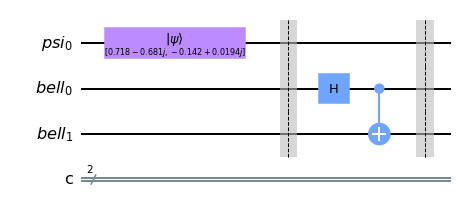

In [42]:
#building the circuit

#entangled bit between bell0 and bell1

teleport.h(bell[0])
teleport.cx(bell[0],bell[1])
teleport.barrier()
teleport.draw(output='mpl')

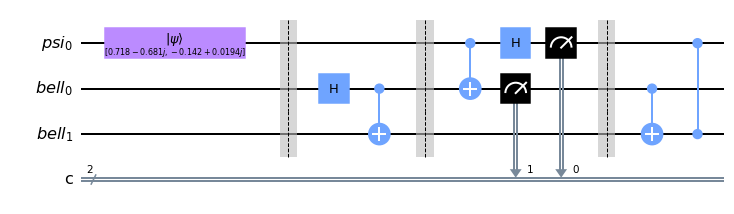

In [43]:
#applying CNOT gate to psi and bell[0] and then h gate to psi

teleport.cx(psi,bell[0])
teleport.h(psi)

teleport.measure([psi[0],bell[0]],c)
teleport.barrier()

# Bob applies his gates depending on the values received from Alice 

teleport.cx(bell[0],bell[1])
teleport.cz(psi,bell[1])

teleport.draw(output='mpl')


In [44]:
#statevector sim

backend = Aer.get_backend('statevector_simulator')
job = execute(teleport,backend)
result = job.result()
output = result.get_statevector()
print(output)

[ 0.71848633-0.68070504j  0.        +0.j          0.        +0.j
  0.        +0.j         -0.1415711 +0.01938238j -0.        +0.j
 -0.        +0.j         -0.        +0.j        ]
